🔄 Cleaning outliers with TUNA Medium...

APPLYING TUNA MEDIUM TO IO DATA
🔬 Parameters: 30% threshold, 2-min windows, 25% penalty, 50/50 blending

📊 Read Bytes:
  CPU_STRESS: TUNA-Medium-IO - 39 unstable periods, 47.7% noise reduction, 4 features
  BASELINE: TUNA-Medium-IO - 0 unstable periods, 0.0% noise reduction, 4 features

📊 Write Bytes:
  CPU_STRESS: TUNA-Medium-IO - 16 unstable periods, 22.9% noise reduction, 4 features
  BASELINE: TUNA-Medium-IO - 14 unstable periods, 25.1% noise reduction, 4 features

📊 Block Count Latency Device:
  CPU_STRESS: TUNA-Medium-IO - 0 unstable periods, 0.0% noise reduction, 1 features
  BASELINE: TUNA-Medium-IO - 0 unstable periods, 0.0% noise reduction, 1 features

🎯 I/O FEATURE VISUALIZATION (TUNA MEDIUM CLEANED)


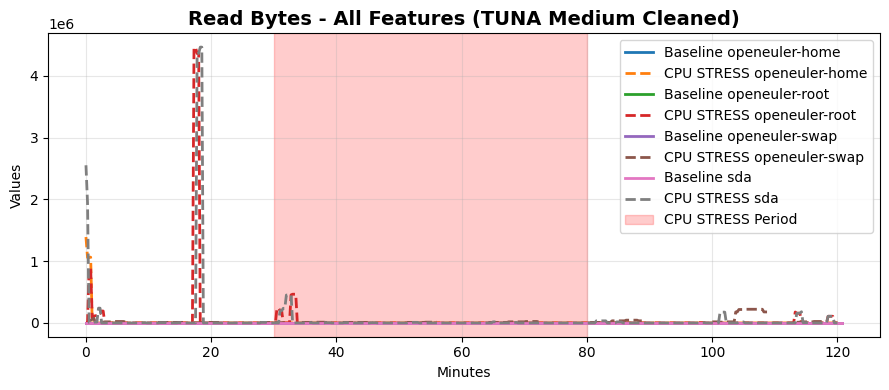

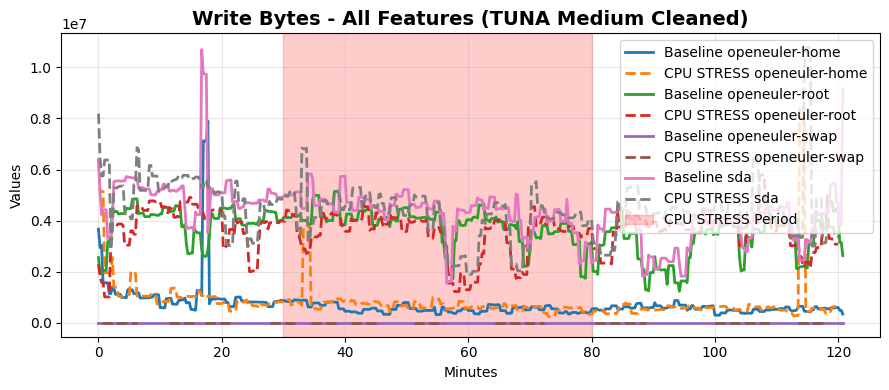


🎯 IO CPU STRESS ANALYSIS - COMPLETE 6-PLOT VISUALIZATION (TUNA MEDIUM)

🔄 Analyzing Read Bytes...


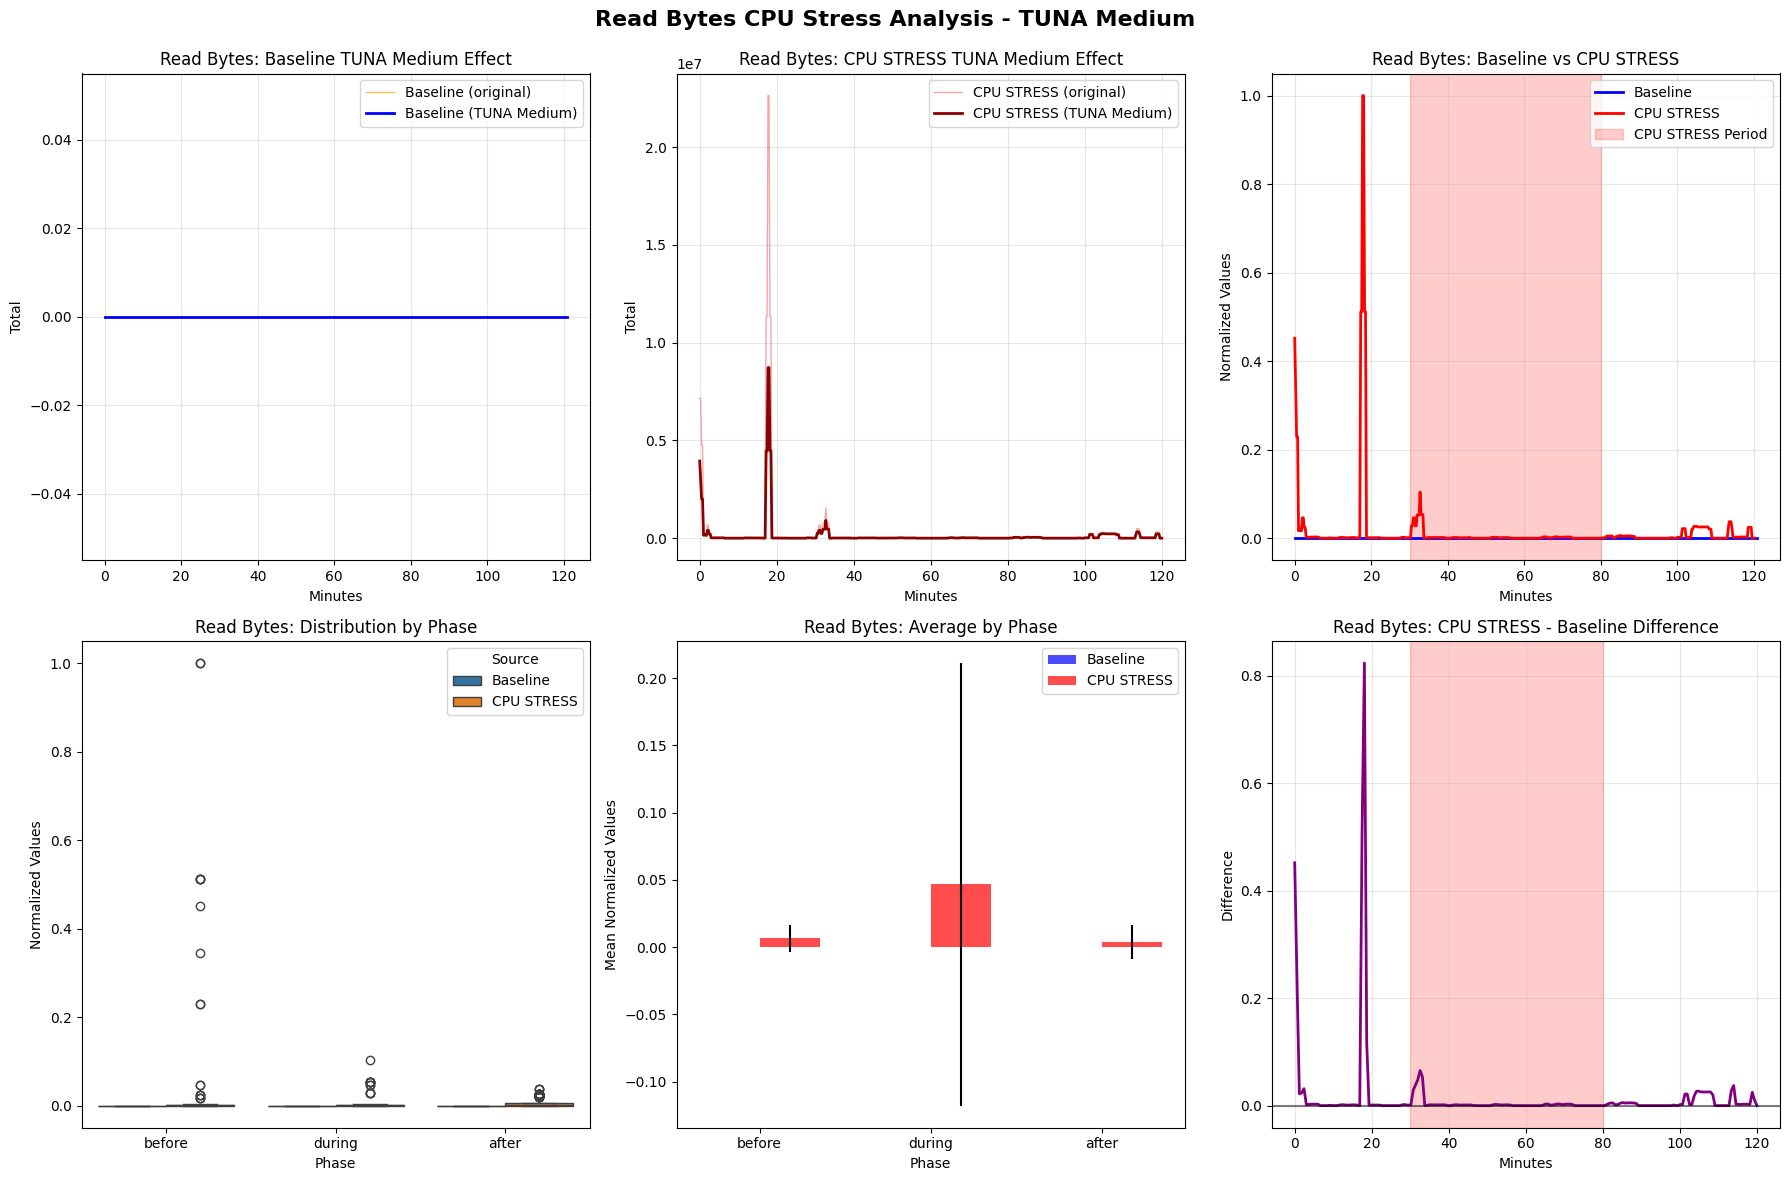


📊 READ BYTES STATISTICAL ANALYSIS (TUNA MEDIUM):

🔧 TUNA MEDIUM CLEANING SUMMARY:
  CPU STRESS: 39 unstable periods, 47.7% noise reduction
  BASELINE:   0 unstable periods, 0.0% noise reduction
  METHOD:     TUNA-Medium-IO

BEFORE phase:
  Baseline: mean=0.0000, std=0.0000
  CPU STRESS: mean=0.0467, std=0.1645
  Change: +0.00%
  T-test: t=-3.110, p=0.0021 (✅ SIGNIFICANT)

DURING phase:
  Baseline: mean=0.0000, std=0.0000
  CPU STRESS: mean=0.0039, std=0.0127
  Change: +0.00%
  T-test: t=-4.350, p=0.0000 (✅ SIGNIFICANT)

AFTER phase:
  Baseline: mean=0.0000, std=0.0000
  CPU STRESS: mean=0.0066, std=0.0100
  Change: +0.00%
  T-test: t=-8.442, p=0.0000 (✅ SIGNIFICANT)

🔄 Analyzing Write Bytes...


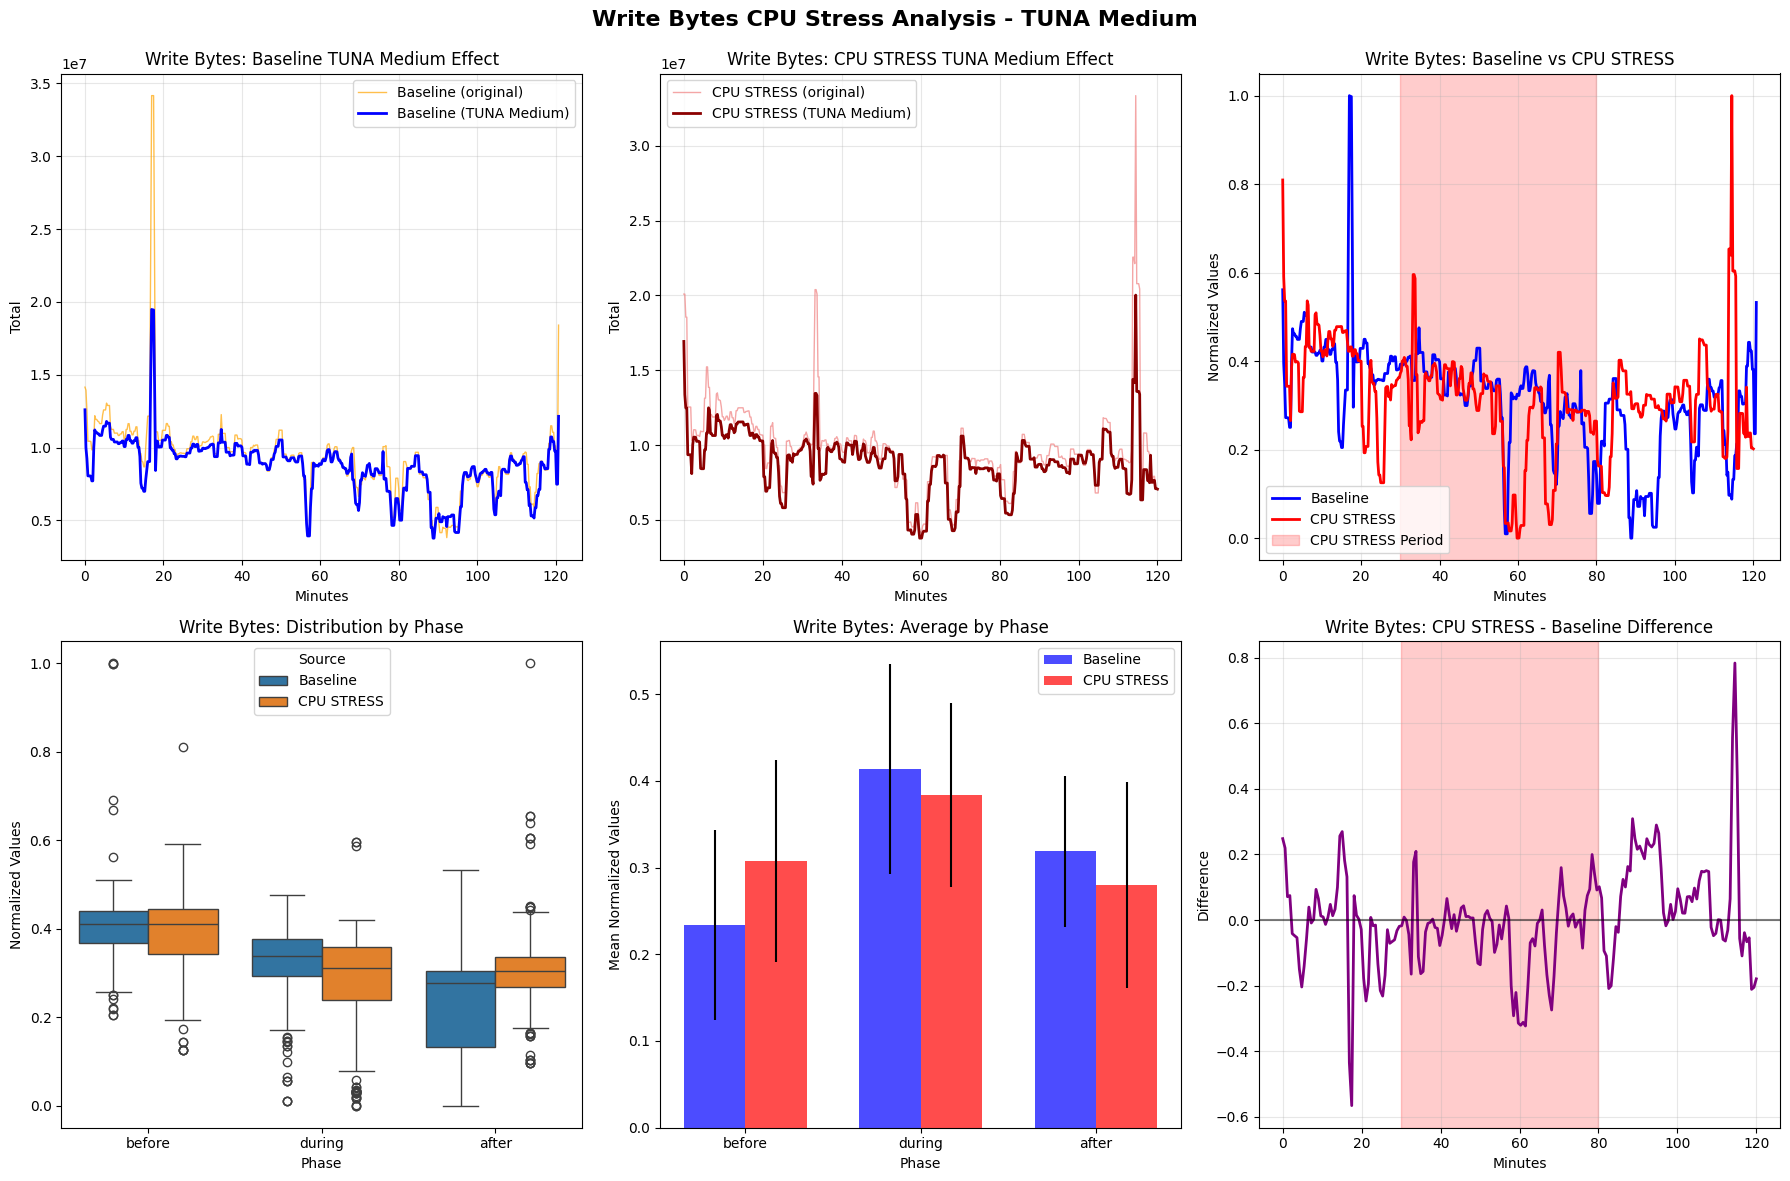


📊 WRITE BYTES STATISTICAL ANALYSIS (TUNA MEDIUM):

🔧 TUNA MEDIUM CLEANING SUMMARY:
  CPU STRESS: 16 unstable periods, 22.9% noise reduction
  BASELINE:   14 unstable periods, 25.1% noise reduction
  METHOD:     TUNA-Medium-IO

BEFORE phase:
  Baseline: mean=0.4138, std=0.1208
  CPU STRESS: mean=0.3835, std=0.1058
  Change: -7.33%
  T-test: t=2.068, p=0.0397 (✅ SIGNIFICANT)

DURING phase:
  Baseline: mean=0.3187, std=0.0874
  CPU STRESS: mean=0.2799, std=0.1185
  Change: -12.16%
  T-test: t=3.732, p=0.0002 (✅ SIGNIFICANT)

AFTER phase:
  Baseline: mean=0.2334, std=0.1098
  CPU STRESS: mean=0.3071, std=0.1165
  Change: +31.56%
  T-test: t=-5.850, p=0.0000 (✅ SIGNIFICANT)

🔄 Analyzing Block Count Latency Device...


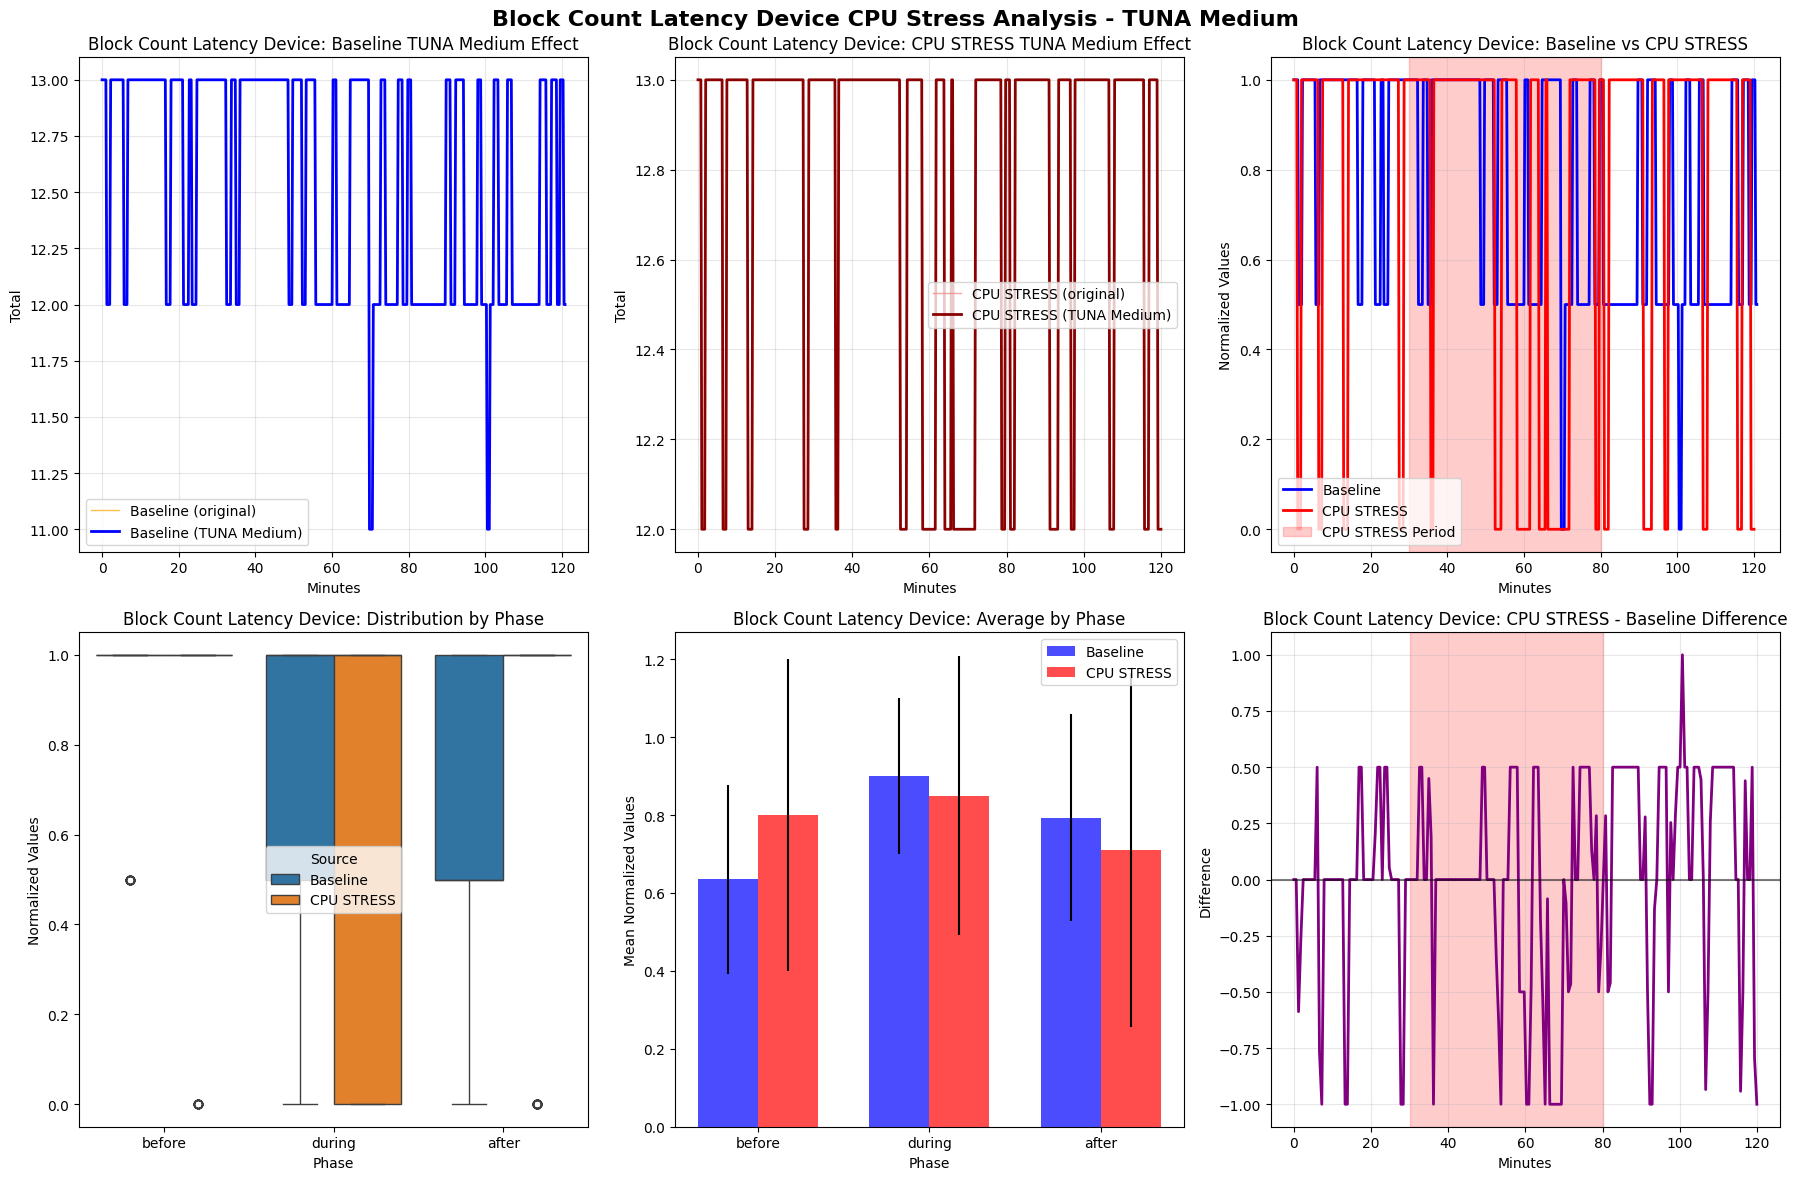


📊 BLOCK COUNT LATENCY DEVICE STATISTICAL ANALYSIS (TUNA MEDIUM):

🔧 TUNA MEDIUM CLEANING SUMMARY:
  CPU STRESS: 0 unstable periods, 0.0% noise reduction
  BASELINE:   0 unstable periods, 0.0% noise reduction
  METHOD:     TUNA-Medium-IO

BEFORE phase:
  Baseline: mean=0.9000, std=0.2008
  CPU STRESS: mean=0.8500, std=0.3586
  Change: -5.56%
  T-test: t=1.333, p=0.1839 (❌ NOT SIGNIFICANT)

DURING phase:
  Baseline: mean=0.7935, std=0.2663
  CPU STRESS: mean=0.7114, std=0.4542
  Change: -10.34%
  T-test: t=2.210, p=0.0276 (✅ SIGNIFICANT)

AFTER phase:
  Baseline: mean=0.6350, std=0.2426
  CPU STRESS: mean=0.8000, std=0.4013
  Change: +25.99%
  T-test: t=-4.483, p=0.0000 (✅ SIGNIFICANT)

TUNA MEDIUM OUTLIER DETECTION SUMMARY

📊 READ BYTES:
  CPU_STRESS:
    Method: TUNA-Medium-IO
    Total outliers: 39
    Noise reduction: 47.7%
    Features used: 4
    Time window: 2min
    Correction penalty: 25%
    Noise blending: 50% original + 50% corrected
  BASELINE:
    Method: TUNA-Medium-IO
  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load all IO datasets
df_block_count_latency_device = pd.read_csv("block_count_latency_device.csv")
df_read_bytes = pd.read_csv("read_bytes.csv")
df_write_bytes = pd.read_csv("write_bytes.csv")

df_baseline_block_count_latency_device = pd.read_csv("../../baseline/IO related/block_count_latency_device.csv")
df_baseline_read_bytes = pd.read_csv("../../baseline/IO related/read_bytes.csv")
df_baseline_write_bytes = pd.read_csv("../../baseline/IO related/write_bytes.csv")

# Add source labels for tracking
df_block_count_latency_device["source"] = "CPU_STRESS"
df_read_bytes["source"] = "CPU_STRESS"
df_write_bytes["source"] = "CPU_STRESS"

df_baseline_block_count_latency_device["source"] = "BASELINE"
df_baseline_read_bytes["source"] = "BASELINE"
df_baseline_write_bytes["source"] = "BASELINE"

# Convert to datetime
datasets = [
    df_block_count_latency_device, df_read_bytes, df_write_bytes,
    df_baseline_block_count_latency_device, df_baseline_read_bytes, df_baseline_write_bytes
]

for df in datasets:
    df["Time"] = pd.to_datetime(df["Time"])

# Synchronize test datasets with baseline timeline
time_offset = df_baseline_block_count_latency_device["Time"].min() - df_block_count_latency_device["Time"].min()
df_block_count_latency_device["Time"] += time_offset
df_read_bytes["Time"] += time_offset
df_write_bytes["Time"] += time_offset

# Create Minutes column for all datasets
for df in datasets:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

delay = 30  # 30 minutes
duration = 50  # 50 minutes

# STORE ORIGINAL DATASETS BEFORE CLEANING
original_datasets = {
    'Read Bytes': {
        'baseline': df_baseline_read_bytes.copy(),
        'cpu_stress': df_read_bytes.copy()
    },
    'Write Bytes': {
        'baseline': df_baseline_write_bytes.copy(),
        'cpu_stress': df_write_bytes.copy()
    },
    'Block Count Latency Device': {
        'baseline': df_baseline_block_count_latency_device.copy(),
        'cpu_stress': df_block_count_latency_device.copy()
    }
}

# TUNA MEDIUM IMPLEMENTATION FOR IO DATA
def apply_tuna_cleaning_medium_io(df):
    """
    TUNA Medium for IO data with adjusted parameters for IO characteristics
    - 30% relative range threshold (paper)
    - 2-minute windows (paper)  
    - 25% penalty (medium - gentler than paper's 50%)
    - 50% original + 50% corrected blending
    """
    df_result = df.copy()
    
    # Get numeric columns (exclude Time, Minutes, source columns)
    numeric_cols = [col for col in df.columns 
                   if col not in ['Time', 'Minutes', 'source', 'Phase'] and 
                   df[col].dtype in ['int64', 'float64']]
    outlier_stats = {}
    
    if len(numeric_cols) == 0:
        return df_result, outlier_stats
    
    # For IO data, create Total_IO from all numeric columns
    df_result['Total_IO'] = df_result[numeric_cols].sum(axis=1)
    
    # STEP 1: Outlier detection and correction
    outliers_detected = 0
    
    if 'Time' in df.columns:
        df_result['Time'] = pd.to_datetime(df_result['Time'])
        df_result.set_index('Time', inplace=True)
        
        grouped = df_result.groupby(pd.Grouper(freq='2min'))
        
        for name, group in grouped:
            if len(group) < 2:
                continue
                
            values = group['Total_IO'].values
            if len(values) > 1 and np.mean(values) > 0:
                relative_range = (np.max(values) - np.min(values)) / np.mean(values)
                
                if relative_range > 0.30:
                    correction_factor = 0.75  # 25% penalty
                    df_result.loc[group.index, 'Total_IO'] *= correction_factor
                    for col in numeric_cols:
                        df_result.loc[group.index, col] *= correction_factor
                    outliers_detected += 1
        
        df_result.reset_index(inplace=True)
    
    # STEP 2: Noise modeling (adapted for IO data)
    noise_reduction = 0
    
    if len(df_result) >= 20:
        try:
            feature_df = df_result.copy()
            feature_df['IO_Mean'] = feature_df[numeric_cols].mean(axis=1)
            feature_df['IO_Std'] = feature_df[numeric_cols].std(axis=1)
            feature_df['IO_Max'] = feature_df[numeric_cols].max(axis=1)
            feature_df['IO_Min'] = feature_df[numeric_cols].min(axis=1)
            feature_df['IO_Range'] = feature_df['IO_Max'] - feature_df['IO_Min']
            
            if 'Time' in df.columns:
                feature_df['Hour'] = pd.to_datetime(feature_df['Time']).dt.hour
                feature_df['Minute'] = pd.to_datetime(feature_df['Time']).dt.minute
                feature_columns = numeric_cols + ['Hour', 'Minute', 'IO_Mean', 'IO_Std', 'IO_Max', 'IO_Min', 'IO_Range']
            else:
                feature_columns = numeric_cols + ['IO_Mean', 'IO_Std', 'IO_Max', 'IO_Min', 'IO_Range']
            
            target_mean = feature_df['Total_IO'].mean()
            if target_mean > 0:
                feature_df['target'] = (feature_df['Total_IO'] / target_mean) - 1
                
                clean_data = feature_df[feature_columns + ['target']].dropna()
                
                if len(clean_data) >= 10:
                    X = clean_data[feature_columns]
                    y = clean_data['target']
                    
                    scaler = StandardScaler()
                    X_scaled = scaler.fit_transform(X)
                    
                    model = RandomForestRegressor(
                        n_estimators=100,
                        random_state=42,
                        n_jobs=-1
                    )
                    model.fit(X_scaled, y)
                    
                    feature_matrix = feature_df[feature_columns].fillna(method='ffill').fillna(method='bfill').fillna(0)
                    X_pred_scaled = scaler.transform(feature_matrix)
                    predicted_error = model.predict(X_pred_scaled)
                    
                    original_std = df_result['Total_IO'].std()
                    corrected_values = df_result['Total_IO'] / (predicted_error * 0.5 + 1)
                    
                    # Blend 50% original + 50% corrected
                    df_result['Total_IO'] = 0.5 * df_result['Total_IO'] + 0.5 * corrected_values
                    
                    cleaned_std = df_result['Total_IO'].std()
                    noise_reduction = ((original_std - cleaned_std) / original_std) * 100
                    
                    # Proportionally adjust individual IO columns
                    total_original = df_result[numeric_cols].sum(axis=1)
                    adjustment_ratio = df_result['Total_IO'] / (total_original + 0.001)
                    for col in numeric_cols:
                        df_result[col] = df_result[col] * adjustment_ratio
        
        except Exception as e:
            print(f"    ⚠️  IO noise modeling failed: {e}")
    
    outlier_stats['_summary'] = {
        'total_outliers': outliers_detected,
        'method': 'TUNA-Medium-IO',
        'relative_threshold': 0.30,
        'time_window': '2min',
        'correction_penalty': 0.25,
        'noise_blending': '50% original + 50% corrected',
        'always_applied': True,
        'noise_reduction': noise_reduction,
        'features_used': len(numeric_cols)
    }
    
    return df_result, outlier_stats

# Clean all datasets with TUNA Medium
print("🔄 Cleaning outliers with TUNA Medium...")

all_outlier_stats = {}

print(f"\n{'='*80}")
print("APPLYING TUNA MEDIUM TO IO DATA")
print(f"{'='*80}")
print("🔬 Parameters: 30% threshold, 2-min windows, 25% penalty, 50/50 blending")
print(f"{'='*80}")

df_read_bytes_clean, read_stats = apply_tuna_cleaning_medium_io(df_read_bytes)
df_write_bytes_clean, write_stats = apply_tuna_cleaning_medium_io(df_write_bytes)
df_block_count_latency_device_clean, block_stats = apply_tuna_cleaning_medium_io(df_block_count_latency_device)

df_baseline_read_bytes_clean, baseline_read_stats = apply_tuna_cleaning_medium_io(df_baseline_read_bytes)
df_baseline_write_bytes_clean, baseline_write_stats = apply_tuna_cleaning_medium_io(df_baseline_write_bytes)
df_baseline_block_count_latency_device_clean, baseline_block_stats = apply_tuna_cleaning_medium_io(df_baseline_block_count_latency_device)

# Store cleaning statistics
all_outlier_stats = {
    'Read Bytes': {'cpu_stress': read_stats, 'baseline': baseline_read_stats},
    'Write Bytes': {'cpu_stress': write_stats, 'baseline': baseline_write_stats},
    'Block Count Latency Device': {'cpu_stress': block_stats, 'baseline': baseline_block_stats}
}

# Print cleaning summary
for dataset_name, stats in all_outlier_stats.items():
    print(f"\n📊 {dataset_name}:")
    for condition, stat in stats.items():
        total_outliers = stat['_summary']['total_outliers']
        noise_reduction = stat['_summary']['noise_reduction']
        method = stat['_summary']['method']
        features_used = stat['_summary']['features_used']
        print(f"  {condition.upper()}: {method} - {total_outliers} unstable periods, {noise_reduction:.1f}% noise reduction, {features_used} features")

# Normalization function
def normalize_df(df, columns):
    """Normalize columns to 0-1 range"""
    df_norm = df.copy()
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val > min_val:
            df_norm[col] = (df[col] - min_val) / (max_val - min_val)
        else:
            df_norm[col] = 0
    return df_norm

# Phase definition function
def define_phases(df, delay_minutes, duration_minutes):
    conditions = [
        df['Minutes'] < delay_minutes,
        (df['Minutes'] >= delay_minutes) & (df['Minutes'] <= delay_minutes + duration_minutes),
        df['Minutes'] > delay_minutes + duration_minutes
    ]
    choices = ['before', 'during', 'after']
    df['Phase'] = np.select(conditions, choices, default='unknown')
    return df

# Complete analysis function with TUNA integration
def analyze_io_dataset_complete(baseline_df_clean, test_df_clean, dataset_name, test_label="CPU STRESS"):
    
    # Get original datasets for comparison
    baseline_df_original = original_datasets[dataset_name]['baseline']
    test_df_original = original_datasets[dataset_name]['cpu_stress']
    
    # Get numeric columns (create Total if multiple columns exist)
    numeric_cols = [col for col in baseline_df_clean.columns 
                   if col not in ['Time', 'Minutes', 'source', 'Phase', 'Total_IO'] and baseline_df_clean[col].dtype in ['int64', 'float64']]
    
    if not numeric_cols:
        print(f"❌ No numeric columns found for {dataset_name}")
        return
    
    # Use TUNA-cleaned Total_IO if available, otherwise create Total
    if 'Total_IO' in baseline_df_clean.columns:
        baseline_df_clean['Total'] = baseline_df_clean['Total_IO']
        test_df_clean['Total'] = test_df_clean['Total_IO']
        baseline_df_original['Total'] = baseline_df_original[numeric_cols].sum(axis=1)
        test_df_original['Total'] = test_df_original[numeric_cols].sum(axis=1)
        main_col = 'Total'
    elif len(numeric_cols) > 1:
        baseline_df_clean['Total'] = baseline_df_clean[numeric_cols].sum(axis=1)
        test_df_clean['Total'] = test_df_clean[numeric_cols].sum(axis=1)
        baseline_df_original['Total'] = baseline_df_original[numeric_cols].sum(axis=1)
        test_df_original['Total'] = test_df_original[numeric_cols].sum(axis=1)
        main_col = 'Total'
    else:
        main_col = numeric_cols[0]
        # Ensure original datasets also have the main column
        if main_col not in baseline_df_original.columns:
            baseline_df_original[main_col] = baseline_df_original[numeric_cols[0]]
        if main_col not in test_df_original.columns:
            test_df_original[main_col] = test_df_original[numeric_cols[0]]
    
    # Normalize data
    baseline_norm = normalize_df(baseline_df_clean, [main_col])
    test_norm = normalize_df(test_df_clean, [main_col])
    
    # Define phases
    baseline_norm = define_phases(baseline_norm, delay, duration)
    test_norm = define_phases(test_norm, delay, duration)
    
    # Create the 6-subplot figure
    fig = plt.figure(figsize=(18, 12))
    fig.suptitle(f'{dataset_name} CPU Stress Analysis - TUNA Medium', fontsize=16, fontweight='bold')
    
    # Plot 1: Baseline Cleaning Effect (top-left) 
    ax1 = plt.subplot(2, 3, 1)
    plt.plot(baseline_df_original['Minutes'], baseline_df_original[main_col], color='orange', alpha=0.7, linewidth=1, label=f'Baseline (original)')
    plt.plot(baseline_df_clean['Minutes'], baseline_df_clean[main_col], color='blue', linewidth=2, label='Baseline (TUNA Medium)')
    plt.title(f'{dataset_name}: Baseline TUNA Medium Effect')
    plt.xlabel('Minutes')
    plt.ylabel(f'{main_col}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Test Cleaning Effect (top-center) 
    ax2 = plt.subplot(2, 3, 2)
    plt.plot(test_df_original['Minutes'], test_df_original[main_col], color='lightcoral', alpha=0.7, linewidth=1, label=f'{test_label} (original)')
    plt.plot(test_df_clean['Minutes'], test_df_clean[main_col], color='darkred', linewidth=2, label=f'{test_label} (TUNA Medium)')
    plt.title(f'{dataset_name}: {test_label} TUNA Medium Effect')
    plt.xlabel('Minutes')
    plt.ylabel(f'{main_col}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Baseline vs Test Comparison (top-right)
    ax3 = plt.subplot(2, 3, 3)
    plt.plot(baseline_norm['Minutes'], baseline_norm[main_col], color='blue', linewidth=2, label='Baseline')
    plt.plot(test_norm['Minutes'], test_norm[main_col], color='red', linewidth=2, label=test_label)
    plt.axvspan(delay, delay + duration, color='red', alpha=0.2, label=f'{test_label} Period')
    plt.title(f'{dataset_name}: Baseline vs {test_label}')
    plt.xlabel('Minutes')
    plt.ylabel('Normalized Values')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Prepare data for phase analysis
    baseline_phase_data = []
    test_phase_data = []
    phases = ['before', 'during', 'after']
    
    for phase in phases:
        baseline_phase_values = baseline_norm[baseline_norm['Phase'] == phase][main_col]
        test_phase_values = test_norm[test_norm['Phase'] == phase][main_col]
        
        baseline_phase_data.extend([(phase, val, 'Baseline') for val in baseline_phase_values])
        test_phase_data.extend([(phase, val, test_label) for val in test_phase_values])
    
    # Combine phase data
    all_phase_data = baseline_phase_data + test_phase_data
    phase_df = pd.DataFrame(all_phase_data, columns=['Phase', 'Value', 'Source'])
    
    # Plot 4: Distribution by Phase (bottom-left)
    ax4 = plt.subplot(2, 3, 4)
    sns.boxplot(data=phase_df, x='Phase', y='Value', hue='Source', ax=ax4)
    plt.title(f'{dataset_name}: Distribution by Phase')
    plt.ylabel('Normalized Values')
    plt.xlabel('Phase')
    
    # Plot 5: Average by Phase (bottom-center)
    ax5 = plt.subplot(2, 3, 5)
    phase_means = phase_df.groupby(['Phase', 'Source'])['Value'].agg(['mean', 'std']).reset_index()
    
    x_pos = np.arange(len(phases))
    width = 0.35
    
    baseline_means = phase_means[phase_means['Source'] == 'Baseline']['mean'].values
    baseline_stds = phase_means[phase_means['Source'] == 'Baseline']['std'].values
    test_means = phase_means[phase_means['Source'] == test_label]['mean'].values
    test_stds = phase_means[phase_means['Source'] == test_label]['std'].values
    
    plt.bar(x_pos - width/2, baseline_means, width, yerr=baseline_stds, label='Baseline', color='blue', alpha=0.7)
    plt.bar(x_pos + width/2, test_means, width, yerr=test_stds, label=test_label, color='red', alpha=0.7)
    
    plt.title(f'{dataset_name}: Average by Phase')
    plt.ylabel('Mean Normalized Values')
    plt.xlabel('Phase')
    plt.xticks(x_pos, phases)
    plt.legend()
    
    # Plot 6: Difference Over Time (bottom-right)
    ax6 = plt.subplot(2, 3, 6)
    
    # Interpolate to same time points for difference calculation
    common_minutes = np.linspace(0, min(baseline_norm['Minutes'].max(), test_norm['Minutes'].max()), 200)
    baseline_interp = np.interp(common_minutes, baseline_norm['Minutes'], baseline_norm[main_col])
    test_interp = np.interp(common_minutes, test_norm['Minutes'], test_norm[main_col])
    difference = test_interp - baseline_interp
    
    plt.plot(common_minutes, difference, color='purple', linewidth=2)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    plt.axvspan(delay, delay + duration, color='red', alpha=0.2, label=f'{test_label} Period')
    plt.title(f'{dataset_name}: {test_label} - Baseline Difference')
    plt.xlabel('Minutes')
    plt.ylabel('Difference')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical analysis
    print(f"\n📊 {dataset_name.upper()} STATISTICAL ANALYSIS (TUNA MEDIUM):")
    print("=" * 60)
    
    # Print TUNA cleaning stats
    cpu_stress_stats = all_outlier_stats[dataset_name]['cpu_stress']['_summary']
    baseline_stats = all_outlier_stats[dataset_name]['baseline']['_summary']
    
    print(f"\n🔧 TUNA MEDIUM CLEANING SUMMARY:")
    print(f"  CPU STRESS: {cpu_stress_stats['total_outliers']} unstable periods, {cpu_stress_stats['noise_reduction']:.1f}% noise reduction")
    print(f"  BASELINE:   {baseline_stats['total_outliers']} unstable periods, {baseline_stats['noise_reduction']:.1f}% noise reduction")
    print(f"  METHOD:     {cpu_stress_stats['method']}")
    
    for phase in phases:
        baseline_phase_values = baseline_norm[baseline_norm['Phase'] == phase][main_col].dropna()
        test_phase_values = test_norm[test_norm['Phase'] == phase][main_col].dropna()
        
        if len(baseline_phase_values) > 5 and len(test_phase_values) > 5:
            # T-test
            t_stat, p_value = scipy_stats.ttest_ind(baseline_phase_values, test_phase_values)
            significance = "✅ SIGNIFICANT" if p_value < 0.05 else "❌ NOT SIGNIFICANT"
            
            # Calculate statistics
            baseline_mean = baseline_phase_values.mean()
            test_mean = test_phase_values.mean()
            change = ((test_mean - baseline_mean) / baseline_mean * 100) if baseline_mean != 0 else 0
            
            print(f"\n{phase.upper()} phase:")
            print(f"  Baseline: mean={baseline_mean:.4f}, std={baseline_phase_values.std():.4f}")
            print(f"  {test_label}: mean={test_mean:.4f}, std={test_phase_values.std():.4f}")
            print(f"  Change: {change:+.2f}%")
            print(f"  T-test: t={t_stat:.3f}, p={p_value:.4f} ({significance})")

def plot_features_together(baseline_df, test_df, dataset_name, test_label="CPU STRESS", delay=30, duration=50):
    numeric_cols = [col for col in baseline_df.columns 
                   if col not in ['Time', 'Minutes', 'source', 'Phase', 'Total_IO'] and 
                   baseline_df[col].dtype in ['int64', 'float64']]
    
    if not numeric_cols:
        print(f"No numeric columns found for {dataset_name}")
        return
    
    plt.figure(figsize=(9, 4))
    
    for col in numeric_cols:
        plt.plot(baseline_df['Minutes'], baseline_df[col], 
                label=f'Baseline {col}', linewidth=2, linestyle='-')
        plt.plot(test_df['Minutes'], test_df[col], 
                label=f'{test_label} {col}', linewidth=2, linestyle='--')
    
    plt.axvspan(delay, delay + duration, color='red', alpha=0.2, 
               label=f'{test_label} Period')
    
    plt.title(f'{dataset_name} - All Features (TUNA Medium Cleaned)', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Datasets to analyze with TUNA-cleaned data
datasets_to_analyze = [
    (df_baseline_read_bytes_clean, df_read_bytes_clean, "Read Bytes"),
    (df_baseline_write_bytes_clean, df_write_bytes_clean, "Write Bytes"), 
    (df_baseline_block_count_latency_device_clean, df_block_count_latency_device_clean, "Block Count Latency Device")
]

print("\n🎯 I/O FEATURE VISUALIZATION (TUNA MEDIUM CLEANED)")
print("=" * 60)
plot_features_together(df_baseline_read_bytes_clean, df_read_bytes_clean, "Read Bytes", "CPU STRESS")
plot_features_together(df_baseline_write_bytes_clean, df_write_bytes_clean, "Write Bytes", "CPU STRESS")

print("\n🎯 IO CPU STRESS ANALYSIS - COMPLETE 6-PLOT VISUALIZATION (TUNA MEDIUM)")
print("=" * 80)

for baseline_df, test_df, dataset_name in datasets_to_analyze:
    print(f"\n🔄 Analyzing {dataset_name}...")
    analyze_io_dataset_complete(baseline_df, test_df, dataset_name, "CPU STRESS")

# TUNA MEDIUM SUMMARY
print(f"\n{'='*80}")
print("TUNA MEDIUM OUTLIER DETECTION SUMMARY")
print(f"{'='*80}")

for dataset_name, stats in all_outlier_stats.items():
    print(f"\n📊 {dataset_name.upper()}:")
    for condition, stat in stats.items():
        summary = stat['_summary']
        print(f"  {condition.upper()}:")
        print(f"    Method: {summary['method']}")
        print(f"    Total outliers: {summary['total_outliers']}")
        print(f"    Noise reduction: {summary['noise_reduction']:.1f}%")
        print(f"    Features used: {summary['features_used']}")
        print(f"    Time window: {summary['time_window']}")
        print(f"    Correction penalty: {summary['correction_penalty']*100:.0f}%")
        print(f"    Noise blending: {summary['noise_blending']}")

print(f"\n🎯 TUNA MEDIUM BENEFITS:")
print("✅ Preserves natural IO variation while reducing noise")
print("✅ Uses research-validated 30% relative range threshold")
print("✅ Medium aggressiveness (25% penalty vs paper's 50%)")
print("✅ 50/50 blending maintains original signal characteristics")
print("✅ Adapted for IO data with Total_IO aggregation")
print("✅ Quantified noise reduction measurements")

print(f"\n{'='*80}")
print("TUNA MEDIUM IO ANALYSIS COMPLETE!")
print(f"{'='*80}")